In [1]:
import pandas as pd
from oceanograpy.io import cnv
from oceanograpy.io import _variable_defs as vardef
import importlib as imp
import xarray as xr 
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
fn = 'Sta0001.cnv'

In [3]:
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [4]:
header_info = cnv.read_header(fn)


In [146]:
header_info['start_time']

Timestamp('2000-01-01 06:43:32')

In [147]:
ds.TIME_ELAPSED/60

<xarray.DataArray 'TIME_ELAPSED' (scan_count: 3686)>
array([182.62138933, 182.62138934, 182.62138935, ..., 182.62142779,
       182.6214278 , 182.62142783])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:    Days since 1970-01-01 00:00:00

In [148]:
    start_time_days_since_epoch = ((header_info['start_time'] 
                                    - pd.Timestamp('1970-01-01'))
                                / pd.to_timedelta(1, unit='D'))

In [149]:
start_time_days_since_epoch

10957.280231481482

In [150]:
ds_uf = cnv.read_cnv(fn, apply_flags=False)
ds = cnv.read_cnv(fn, apply_flags=True)

In [151]:
ds.TIME_ELAPSED

<xarray.DataArray 'TIME_ELAPSED' (scan_count: 3686)>
array([10957.28335986, 10957.28336034, 10957.28336082, ...,
       10957.28566744, 10957.28566792, 10957.28566985])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:    Days since 1970-01-01 00:00:00

In [152]:
ds_binned = cnv.bin_to_pressure(ds, dp = 2)

In [ ]:
0.5*150/

In [155]:
24*60*(ds_binned.TIME_ELAPSED[-1]- ds_binned.TIME_ELAPSED[0])

<xarray.DataArray 'TIME_ELAPSED' ()>
array(3.1151254)
Attributes:
    units:    Days since 1970-01-01 00:00:00

In [74]:
line = '# start_time = Jan 01 2000 06:43:32 [NMEA time, header]'

In [ ]:
pd.p

In [80]:
start_time_str

'Jan 01 2000 06:43:32'

In [81]:
start_time_str = ' '.join(line.split()[3:7])
start_time_pdtime = pd.to_datetime(start_time_str,
               format='%b %d %Y %H:%M:%S')


Timestamp('2000-01-01 06:43:32')

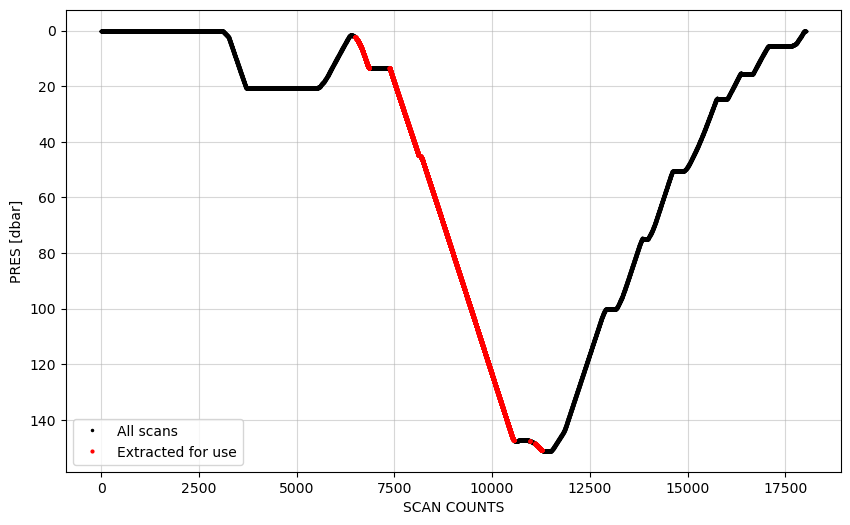

In [27]:
ds = cnv.read_cnv(fn, apply_flags=True, inspect_plot=True, start_scan = None)

## Binning 

In [6]:
dp = 2

In [7]:
# Specifying in order to conserve attributes (units etc) through the
# following operations
xr.set_options(keep_attrs=True)

In [17]:
len(Pi)

73

In [40]:
ds_binned.set_coords?

Signature: ds_binned.set_coords(names: 'Hashable | Iterable[Hashable]') -> 'T_Dataset'
Docstring:
Given names of one or more variables, set them as coordinates

Parameters
----------
names : hashable or iterable of hashable
    Name(s) of variables in this dataset to convert into coordinates.

Examples
--------
>>> dataset = xr.Dataset(
...     {
...         "pressure": ("time", [1.013, 1.2, 3.5]),
...         "time": pd.date_range("2023-01-01", periods=3),
...     }
... )
>>> dataset
<xarray.Dataset>
Dimensions:   (time: 3)
Coordinates:
  * time      (time) datetime64[ns] 2023-01-01 2023-01-02 2023-01-03
Data variables:
    pressure  (time) float64 1.013 1.2 3.5

>>> dataset.set_coords("pressure")
<xarray.Dataset>
Dimensions:   (time: 3)
Coordinates:
    pressure  (time) float64 1.013 1.2 3.5
  * time      (time) datetime64[ns] 2023-01-01 2023-01-02 2023-01-03
Data variables:
    *empty*

On calling ``set_coords`` , these data variables are converted to coordinates, as shown in the fi

In [50]:
ds_binned.swap_dims({'PRES_bins':'PRES'}).drop_vars('PRES_bins')


<xarray.Dataset>
Dimensions:       (PRES: 73)
Coordinates:
  * PRES          (PRES) float64 5.0 7.0 9.0 11.0 ... 143.0 145.0 147.0 149.0
Data variables: (12/14)
    TEMP1         (PRES) float64 -1.293 -1.293 -1.295 ... -0.4952 -0.4871
    TEMP2         (PRES) float64 -1.294 -1.29 -1.292 ... -0.5106 -0.4965 -0.4874
    CNDC1         (PRES) float64 2.437 2.437 2.437 2.437 ... 2.801 2.804 2.805
    CNDC2         (PRES) float64 2.437 2.437 2.437 2.437 ... 2.801 2.804 2.805
    DOXY1         (PRES) float64 383.4 383.5 383.7 383.3 ... 280.2 280.0 279.9
    CDOM1         (PRES) float64 0.112 0.1099 0.11 ... 0.1145 0.1139 0.1134
    ...            ...
    TIME_ELAPSED  (PRES) float64 275.7 278.3 280.4 282.5 ... 437.0 440.7 462.6
    LATITUDE      (PRES) float64 81.27 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (PRES) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786 -9.786
    PSAL1         (PRES) float64 30.12 30.12 30.12 30.12 ... 34.12 34.14 34.15
    PSAL2         (PRES) float64 30.12 30.12 30.12 30.13 ... 34.12 34.14 34.14
    SBE_FLAG      (PRES) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [44]:
dsb_a = ds_binned.rename_dims({'PRES_bins':'PRES'})


ValueError: Cannot rename PRES_bins to PRES because PRES already exists. Try using swap_dims instead.

In [ ]:
dd = xr.Datds_binned

In [43]:
dsb_a

<xarray.Dataset>
Dimensions:       (PRES_bins: 73)
Coordinates:
  * PRES_bins     (PRES_bins) object (4.0, 6.0] (6.0, 8.0] ... (148.0, 150.0]
    PRES          (PRES_bins) float64 5.0 7.0 9.0 11.0 ... 145.0 147.0 149.0
Data variables: (12/14)
    TEMP1         (PRES_bins) float64 -1.293 -1.293 -1.295 ... -0.4952 -0.4871
    TEMP2         (PRES_bins) float64 -1.294 -1.29 -1.292 ... -0.4965 -0.4874
    CNDC1         (PRES_bins) float64 2.437 2.437 2.437 ... 2.801 2.804 2.805
    CNDC2         (PRES_bins) float64 2.437 2.437 2.437 ... 2.801 2.804 2.805
    DOXY1         (PRES_bins) float64 383.4 383.5 383.7 ... 280.2 280.0 279.9
    CDOM1         (PRES_bins) float64 0.112 0.1099 0.11 ... 0.1145 0.1139 0.1134
    ...            ...
    TIME_ELAPSED  (PRES_bins) float64 275.7 278.3 280.4 ... 437.0 440.7 462.6
    LATITUDE      (PRES_bins) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (PRES_bins) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1         (PRES_bins) float64 30.12 30.12 30.12 ... 34.12 34.14 34.15
    PSAL2         (PRES_bins) float64 30.12 30.12 30.12 ... 34.12 34.14 34.14
    SBE_FLAG      (PRES_bins) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [166]:
dsb_a = ds_binned.set_index({'PRES'})

NameError: name 'ds_binned' is not defined

In [11]:
ds_binned.TEMP1

<xarray.DataArray 'TEMP1' (PRES_bins: 73)>
array([-1.29263906, -1.29309782, -1.29505334, -1.29290968, -1.30545718,
       -1.31931155, -1.37778109, -1.38998245, -1.39089029, -1.39672992,
       -1.41337731, -1.44734154, -1.48535316, -1.5164805 , -1.56743868,
       -1.58805235, -1.60523172, -1.61135107, -1.59528504, -1.59095009,
       -1.58651549, -1.59070403, -1.59128202, -1.58415777, -1.56684782,
       -1.52138875, -1.50957043, -1.50131549, -1.49244754, -1.47784611,
       -1.47371882, -1.44865276, -1.42773044, -1.40891281, -1.39391944,
       -1.40123112, -1.4043882 , -1.38080045, -1.38885875, -1.39232329,
       -1.35412248, -1.22769681, -1.09717834, -1.04315279, -0.99640914,
       -0.92984042, -0.93489311, -0.87097649, -0.81161278, -0.76563828,
       -0.75562679, -0.74901421, -0.74017036, -0.73775976, -0.73746921,
       -0.73237742, -0.72477196, -0.71981918, -0.70674344, -0.69609319,
       -0.67481594, -0.64461216, -0.62011687, -0.60707644, -0.56877205,
       -0.55632261, -0.55032734, -0.53346721, -0.52728951, -0.5180046 ,
       -0.51005258, -0.49521349, -0.48710404])
Coordinates:
  * PRES_bins  (PRES_bins) object (4.0, 6.0] (6.0, 8.0] ... (148.0, 150.0]
Attributes:
    units:    degree_Celsius

<xarray.DataArray 'TEMP1' (scan_count: 3686)>
array([-1.2912, -1.291 , -1.2912, ..., -0.4869, -0.4871, -0.4867])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:                     degree_Celsius
    instrument_serial_number:  5884\n

In [56]:
%matplotlib tk

In [57]:
fig, ax = plt.subplots()
ax.plot(ds.PSAL1, ds.PRES, )
ax.plot(ds_pavg.PSAL1, ds_pavg.PRES, )
ax.plot(ds_binned.PSAL1, Pi, )

ax.invert_yaxis()

In [238]:
pmax_bound

150.0

### Parse instrument details

SN and Cal date

In [6]:
cnvfile = 'Sta0001.cnv'

In [51]:
ds

<xarray.Dataset>
Dimensions:       (scan_count: 3686)
Coordinates:
  * scan_count    (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/15)
    PRES          (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1         (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2         (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    CNDC1         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    CNDC2         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    DOXY1         (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...            ...
    TIME_ELAPSED  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
    LATITUDE      (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG      (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [168]:
sensor_info_dict = {
    'Temperature -->':'temp_sensor_1',
    'Temperature, 2 -->':'temp_sensor_2',
    'Conductivity -->':'cndc_sensor_1',
    'Conductivity, 2 -->':'cndc_sensor_2',
    'Pressure, Digiquartz with TC -->':'pres_sensor',
    'Oxygen, SBE 43 -->':'oxy_sensor_1',
    'Fluorometer, WET Labs ECO-AFL/FL -->':'chla_sensor_1',
    'Transmissometer, WET Labs C-Star -->':'attn_sensor_1',
    'Fluorometer, WET Labs ECO CDOM -->':'cdom_sensor_1',
    'Altimeter -->':'altimeter_sensor_1',
}


In [187]:
imp.reload(vardef)
imp.reload(cnv)

<module 'oceanograpy.io.cnv' from '/home/oyvindl/work/code/python/oceanograPy/src/oceanograpy/io/cnv.py'>

In [188]:
ds = cnv.read_cnv(fn, apply_flags=True)

In [180]:
ds

<xarray.Dataset>
Dimensions:       (scan_count: 3686)
Coordinates:
  * scan_count    (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Data variables: (12/15)
    PRES          (scan_count) float64 2.183 2.194 2.207 ... 150.8 150.8 150.8
    TEMP1         (scan_count) float64 -1.291 -1.291 -1.291 ... -0.4871 -0.4867
    TEMP2         (scan_count) float64 -1.292 -1.292 -1.292 ... -0.4869 -0.4869
    CNDC1         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    CNDC2         (scan_count) float64 2.437 2.437 2.437 ... 2.805 2.805 2.805
    DOXY1         (scan_count) float64 382.7 382.8 382.9 ... 279.7 279.6 279.7
    ...            ...
    TIME_ELAPSED  (scan_count) float64 1.096e+04 1.096e+04 ... 1.096e+04
    LATITUDE      (scan_count) float64 81.27 81.27 81.27 ... 81.27 81.27 81.27
    LONGITUDE     (scan_count) float64 -9.786 -9.786 -9.786 ... -9.786 -9.786
    PSAL1         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    PSAL2         (scan_count) float64 30.12 30.12 30.12 ... 34.15 34.15 34.15
    SBE_FLAG      (scan_count) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    SBE flags applied:  True

In [165]:
sensor_info_dict = cnv.read_sensor_info(cnvfile)

In [158]:
sensor_info_dict

{'temp_sensor_1': {'SN': '5884', 'cal_date': '14-Oct-22'},
 'cndc_sensor_1': {'SN': '2860', 'cal_date': '18-Oct-22'},
 'pres_sensor': {'SN': '141612', 'cal_date': '19-Dec-17'},
 'temp_sensor_2': {'SN': '6504', 'cal_date': '12-Oct-22'},
 'cndc_sensor_2': {'SN': '3123', 'cal_date': '18-Oct-22'},
 'oxy_sensor_1': {'SN': '3785', 'cal_date': '29-Nov-22'},
 'altimeter_sensor_1': {'SN': '73084', 'cal_date': '24/12-2017'},
 'chla_sensor_1': {'SN': 'FLRTD-6506', 'cal_date': '18-Sep-2020'},
 'attn_sensor_1': {'SN': 'CST-2003DR', 'cal_date': '2019-10-01'},
 'cdom_sensor_1': {'SN': 'FLCDRTD-4531', 'cal_date': '12/05/2023'}}

In [153]:
a = ['aa', 'bb']
', '.join(a)

'aa, bb'

In [134]:
import re

In [126]:
0*print('a')

a


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [130]:
sensor_dict = {}
verbose = True 

with open(cnvfile, 'r') as f:
    look_sensor = False

    for n_line, line in enumerate(f.readlines()):
        if '<sensor' in line:
            look_sensor = True
            sensor_header_line = n_line+1
            store_sensor_info = False

       # print(look_sensor)
        if look_sensor:
            #
            if n_line == sensor_header_line:
                for sensor_str, var_key in sensor_info_dict.items():
                #    print(sensor_str)
                    if sensor_str in line:
                        store_sensor_info = True
                        var_key_sensor = var_key
                shline = line.replace('#     <!-- ', '').replace('\n', '')
                (print(f'\nRead from: {var_key_sensor} ({shline})') 
                 if verbose else None)

            
            if store_sensor_info:
                # Grab instrument serial number
                if '<SerialNumber>' in line:
                    rind_sn = line.rindex('<SerialNumber>')+14
                    SN_instr = (line[rind_sn:]
                                .replace('</SerialNumber>', '')
                                .replace('\n', '')
                                .replace(' NPI', ''))
                # Grab calibration date
                if '<CalibrationDate>' in line:
                    rind_cd = line.rindex('<CalibrationDate>')+17
                    cal_date_instr = (line[rind_cd:]
                                .replace('</CalibrationDate>', '')
                                .replace('\n', ''))
        
        if '</sensor>' in line:
            (print(f'SN: {SN_instr}  // cal date: {cal_date_instr}')
             if verbose else None)
            if look_sensor and store_sensor_info:
                sensor_dict[var_key_sensor] = {
                    'SN':SN_instr,
                    'cal_date':cal_date_instr
                }

            (print(f'Stop reading from {var_key_sensor} (save: {store_sensor_info})') 
             if verbose else None)
            look_sensor, var_key_sensor, = False, None
            SN_instr, cal_date_instr = None, None


Read from: temp_sensor_1 (Frequency 0, Temperature -->)
SN: 5884  // cal date: 14-Oct-22
Stop reading from temp_sensor_1 (save: True)

Read from: cndc_sensor_1 (Frequency 1, Conductivity -->)
SN: 2860  // cal date: 18-Oct-22
Stop reading from cndc_sensor_1 (save: True)

Read from: pres_sensor (Frequency 2, Pressure, Digiquartz with TC -->)
SN: 141612  // cal date: 19-Dec-17
Stop reading from pres_sensor (save: True)

Read from: temp_sensor_2 (Frequency 3, Temperature, 2 -->)
SN: 6504  // cal date: 12-Oct-22
Stop reading from temp_sensor_2 (save: True)

Read from: cndc_sensor_2 (Frequency 4, Conductivity, 2 -->)
SN: 3123  // cal date: 18-Oct-22
Stop reading from cndc_sensor_2 (save: True)

Read from: oxy_sensor_1 (A/D voltage 0, Oxygen, SBE 43 -->)
SN: 3785  // cal date: 29-Nov-22
Stop reading from oxy_sensor_1 (save: True)

Read from: altimeter_sensor_1 (A/D voltage 1, Altimeter -->)
SN: 73084  // cal date: 24/12-2017
Stop reading from altimeter_sensor_1 (save: True)

Read from: chla_

In [120]:
sensor_dict

{'temp_sensor_1': {'SN': '5884', 'cal_date': '14-Oct-22'},
 'cndc_sensor_1': {'SN': '2860', 'cal_date': '18-Oct-22'},
 'pres_sensor': {'SN': '141612', 'cal_date': '19-Dec-17'},
 'temp_sensor_2': {'SN': '6504', 'cal_date': '12-Oct-22'},
 'cndc_sensor_2': {'SN': '3123', 'cal_date': '18-Oct-22'},
 'oxy_sensor_1': {'SN': '3785', 'cal_date': '29-Nov-22'},
 'altimeter_sensor_1': {'SN': '73084', 'cal_date': '24/12-2017'},
 'chla_sensor_1': {'SN': 'FLRTD-6506', 'cal_date': '18-Sep-2020'},
 'attn_sensor_1': {'SN': 'CST-2003DR', 'cal_date': '2019-10-01'},
 'cdom_sensor_1': {'SN': 'FLCDRTD-4531', 'cal_date': '12/05/2023'}}

In [32]:
sensor_header_line

285

In [63]:
ds.CDOM1

<xarray.DataArray 'CDOM1' (scan_count: 3686)>
array([0.1099, 0.1099, 0.1099, ..., 0.1139, 0.1138, 0.1137])
Coordinates:
  * scan_count  (scan_count) int64 6486 6487 6488 6489 ... 11271 11272 11276
Attributes:
    units:                     mg m-3
    instrument_serial_number:  FLCDRTD-4531 NPI\n